In [15]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import altair as alt

In [8]:
table = pd.read_csv('/home/david/Documents/GitHub/BachelorThesis/csvs/Full2018-2020.csv')
table.head()

,Date,IDStation,NameStation,Ammonia,Arsenic,Benzene,Benzo_a_pyrene,BlackCarbon,Cadmium,CO,Lead,Nikel,NO,NO2,NOx,Ozone,PM10,PM25,Sulfur_dioxide
0,2018-01-01T00:00:00Z,677,Cremona Via Fatebenefratelli,6.2,NaN,NaN,NaN,NaN,NaN,0.508333,NaN,NaN,NaN,36.175000,63.570833,5.225000,NaN,45.0,1.829167
1,2018-01-01T00:00:00Z,705,Milano Pascal Citta Studi,NaN,NaN,1.5,NaN,2.3,NaN,NaN,NaN,NaN,NaN,33.345833,46.087500,8.575000,34.0,33.0,1.487500
2,2018-01-01T00:00:00Z,681,Moggio,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.341667,3.308333,5.075000,66.100000,5.0,4.0,NaN
3,2018-01-01T00:00:00Z,642,Pavia Via Folperti,4.2,NaN,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.050000,58.416667,6.770833,54.0,46.0,5.941667
4,2018-01-01T00:00:00Z,693,Sannazzaro De Burgondi Agip,5.3,NaN,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.441667,41.362500,NaN,45.0,43.0,4.487500


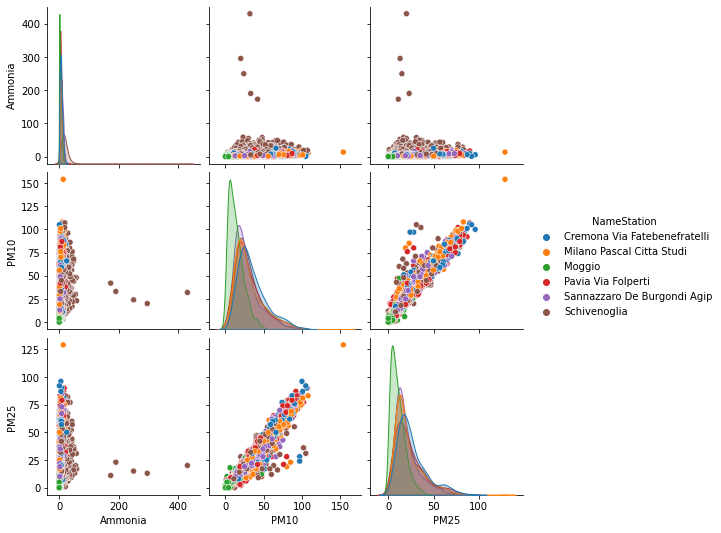

In [9]:
sns.pairplot(table.iloc[:,[2,3,16,17]],hue="NameStation")

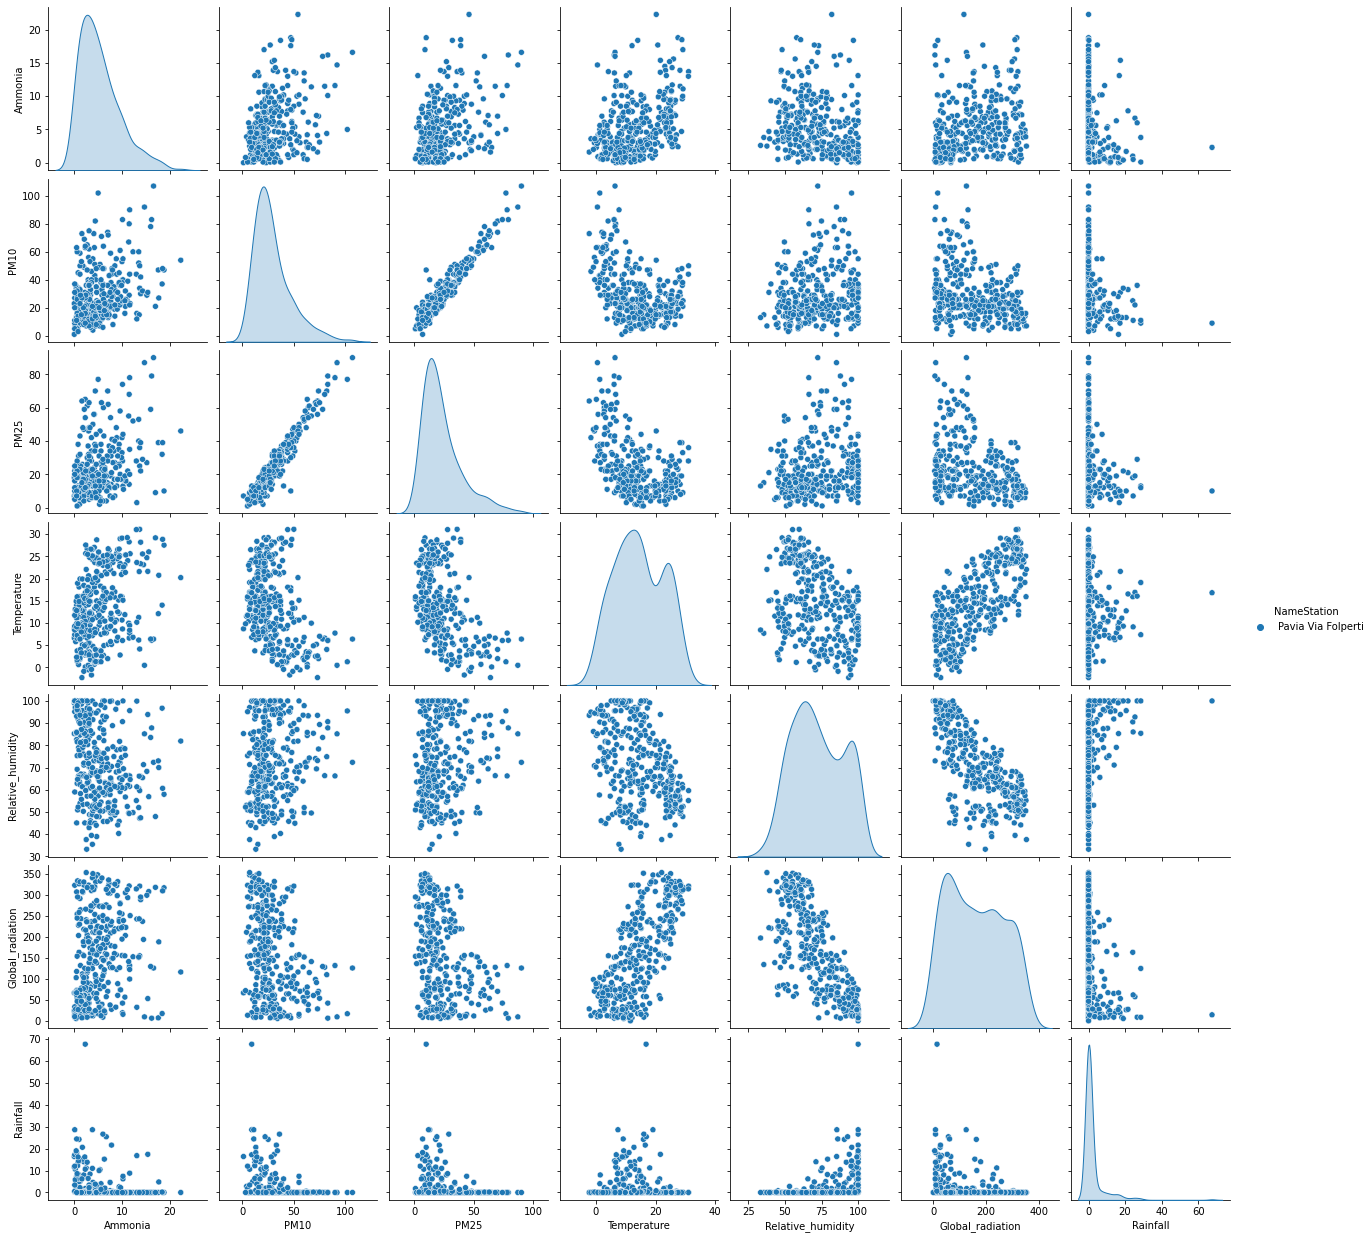

In [6]:
table1 = pd.read_csv('/home/david/Documents/GitHub/BachelorThesis/csvs/aqwePavia19.csv')
sns.pairplot(table1.loc[:,['NameStation','Ammonia','PM10','PM25','Temperature','Relative_humidity','Global_radiation','Rainfall']],hue="NameStation")

In [14]:

table2 = table.iloc[2000:np.shape(table)[0],:] #altair can only use up to 5000 rows

interval = alt.selection_interval()

points = alt.Chart(table2).mark_point().encode(
  x='PM10',
  y='Ammonia',
  color=alt.condition(interval, 'NameStation', alt.value('lightgray'))
).properties(
  selection=interval
)

histogram = alt.Chart(table2).mark_bar().encode(
  x='count()',
  y='NameStation',
  color='NameStation'
).transform_filter(interval)

points & histogram

alt.VConcatChart(...)